# **Project 3**, APS1070 Fall 2021
#### **PCA [10 marks]**
**Deadline: Nov 5th, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**:
*   **Student number**:



In this project we work on a Covid-19 dataset that reports the number  cases for different countries at the end of each day.

# Part 1: Getting started [1 Marks]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np 
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.25]**

### (1) Plots time-series for the input list ###

In [3]:
cases_raw = cases_raw.reset_index()

In [4]:
def plotTimeSeries(cases, country_list):
    plot_raw= pd.DataFrame(np.zeros((cases.shape[1]-1,len(country_list)+1)) ,
                           columns=['Date'] + country_list)
    for country in country_list:
        country_raw = cases[cases['Country']==country]
        country_raw = country_raw.T.drop(['Country']).reset_index().iloc[:,1]
        plot_raw[country] = country_raw       

    date = pd.date_range(start='20200122', end='20220101', freq='D').to_frame()   
    plot_raw['Date'] = date.reset_index().iloc[:cases.shape[1]-1,1]
    plot_raw.plot(x='Date',fontsize=8.5,subplots=True, figsize=(6, 4*len(country_list)), title='Cases Trend in Each Country', ylabel='Number of Cases')

### (2) Apply StandardScalar to the data ###

In [5]:
from sklearn.preprocessing import StandardScaler

cases_std = cases_raw.iloc[:]
country = cases_std['Country']

scaler = StandardScaler()
x_train = scaler.fit_transform(cases_std.iloc[:, 1:])
cases_std.iloc[:,1:] = x_train

### (3) Run the function in step 1 on the standardized dataset ###

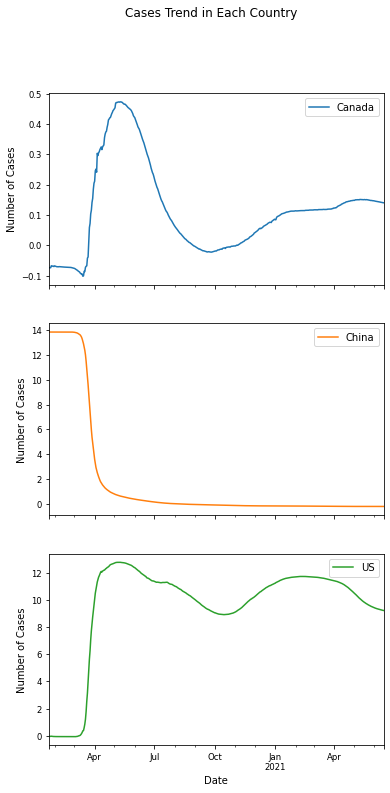

In [6]:
plotTimeSeries(cases_std, ['Canada', 'China', 'US'])

### (4) Discussion the trends in the standardlized time-series for US, Canada, China ###
    
#### When the curve goes up, which appears on the curve for US and Canada around April, the deviation between the number of cases in US and Canada and the mean of cases in all countries becomes larger. When the curve goes down, which appears on the curve for China around April and for Canada around July,  the deviation between each country above and the mean of cases in all countries becomes smaller. The number of covid cases are not negative while the values on the curve are less than zero. It just means that the number of covid cases is less than mean. The sign of values indicates whether the number of cases for a country is higher or lower than the mean.

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

### (1) Compute the covariance matrix of the dataframe ###

In [7]:
cov_mat = np.cov(cases_std.iloc[:,1:].T )
print(cov_mat.shape)

(511, 511)


### (2) Write a function get_sorted_eigen(df_cov) ###

In [8]:
def get_sorted_eigen(df_cov):
    eigenValues, eigenVectors =  np.linalg.eigh(df_cov)
    args = (-eigenValues).argsort()
    eigenValues = eigenValues[args]
    eigenVectors = eigenVectors[:, args]
    return eigenValues, eigenVectors

### (3) Show the effectiveness of principal components ###

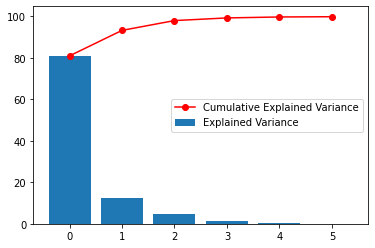

[80.95992954 93.23953264 97.96647351 99.24896476 99.70668524 99.8306911 ]


In [9]:
eigenValues, eigenVectors = get_sorted_eigen(cov_mat)
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

figure_obj=plt.figure()
plt.bar(range(6), expVar[:6], label='Explained Variance')
plt.plot(cumExpVar[:6], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()
print(cumExpVar[:6])

### (4) How many PCs do you need to cover 99% of the dataset's variance? ###
#### Four PCs I need to cover 99% of the dataset's variance.

### (5) Plot the first 16 principal components (Eigenvectors) as a time series ###

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

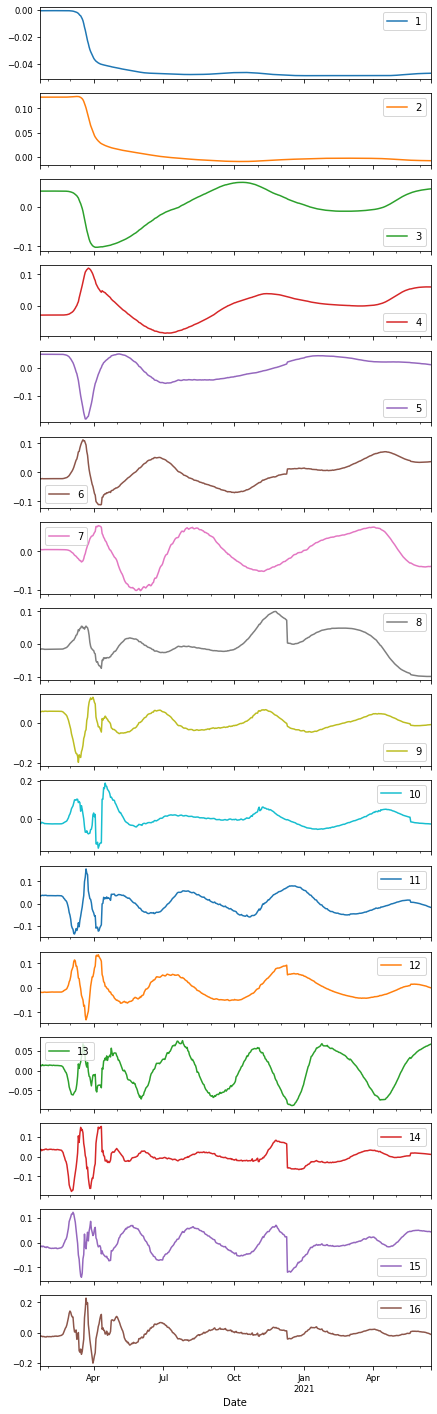

In [10]:
topk = np.arange(1,17).tolist()
plot_mat= pd.DataFrame(np.zeros((511,17)) ,
                           columns=['Date'] + topk)
plot_mat.iloc[:,1:] = eigenVectors[:,:16]         
date = pd.date_range(start='20200122', end='20210615', freq='D').to_frame()   
plot_mat['Date'] = date.reset_index().iloc[:,1]
plot_mat.plot(x='Date',fontsize=8.5,subplots=True, figsize=(7, 25))

### 6. Compare the first few PCs with the rest of them ##

#### The first few PCs show the overall feature profile with larger numerical fluctuation. For example, the number of peaks on the curve in first five figures not larger than 3. That means total number of cases is large at first and decreasing in the rest of time intervial. Differently, for the last five figures, the number of peaks becomes larger with sharp change of trend. This is because the rest of the PCs more focus on the details of the change of data. That means the curve of cases shows obvious fluctuation at some point in the time interval.

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


### (1) Create the function for 1. 2. 3. 4. ###

In [51]:
from sklearn.metrics import mean_squared_error
def reconstructionByPCA(raw, country): 
    plotTimeSeries(raw, [country])
   
    row = raw['Country'] == country
    
    ### topK list
    listPCA = [1, 2, 4, 8, 16]
    
    ### plot matrix
    plot_PCA = pd.DataFrame(np.zeros((raw.shape[1]-1,len(listPCA)+1)) ,
                           columns=['Date'] + listPCA)
    date = pd.date_range(start='20200122', end='20220101', freq='D').to_frame()  
    plot_PCA['Date'] = date.reset_index().iloc[:raw.shape[1]-1,1]
    
    ### PCA
    cases_std = raw.iloc[:].copy(deep=True)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(cases_std.iloc[:, 1:])
    cases_std.iloc[:,1:] = x_train
    cov_mat = np.cov(cases_std.iloc[:,1:].T)
    eigenValues, eigenVectors = get_sorted_eigen(cov_mat)

    for i in range(0, len(listPCA)):
        ### PCA
        W = eigenVectors[:, :listPCA[i]]
        proj = np.dot(cases_std.iloc[:,1:], W)
        recoPCA = np.dot(proj, W.T)
        recoPCA = scaler.inverse_transform(recoPCA)
        plot_PCA.iloc[:, i+1] =  recoPCA[row].reshape(recoPCA[row].shape[1])
        
    plot_PCA.plot(x='Date',fontsize=8.5,subplots=False, figsize=(6, 4),title='PCA Reconstruction in Each k for ' + country, ylabel='Number of Cases')
    
    ### Residual Error
    plot_resError = pd.DataFrame(np.zeros((raw.shape[1]-1,2)) ,
                           columns=['Date', 'Error'])
    date = pd.date_range(start='20200122', end='20220101', freq='D').to_frame()  
    plot_resError['Date'] = date.reset_index().iloc[:raw.shape[1]-1,1]
    
    raw_np = np.asarray(raw[row].iloc[:,1:])
    pred = raw_np.reshape(recoPCA[row].shape[1])
    truth = recoPCA[row].reshape(recoPCA[row].shape[1])
    plot_resError['Error'] = truth - pred
    plot_resError.plot(x='Date',fontsize=8.5,subplots=False, figsize=(6,2), title='Residual Error for ' + country, color='red', ylabel='Resdual Error')
     
    ### RMSE
    raw_np = np.asarray(raw[row].iloc[:,1:])
    RMSE = np.zeros((10,))
    for i in range(0, 10):
        ### PCA
        W = eigenVectors[:, :i]
        proj = np.dot(cases_std.iloc[:,1:], W)
        recoPCA = np.dot(proj, W.T)
        recoPCA = scaler.inverse_transform(recoPCA)
        raw_np = np.asarray(raw[row].iloc[:,1:])
        pred = raw_np.reshape(recoPCA[row].shape[1])
        truth = recoPCA[row].reshape(recoPCA[row].shape[1])
        RMSE[i] = np.sqrt(mean_squared_error(truth, pred))
    
    figure_obj=plt.figure(figsize=(6, 2))
    plt.plot(np.arange(10), 
             RMSE, 'r', linewidth=1.5)
    plt.title('RMSE for ' + country)
    plt.show() 
    


### (2) Test the function using the US, Canada, and China as inputs ###

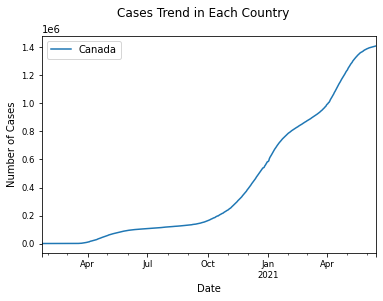

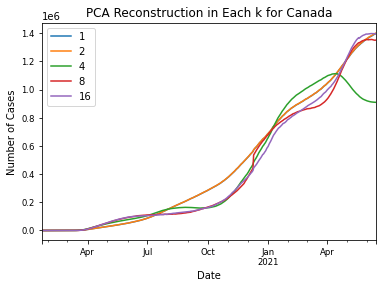

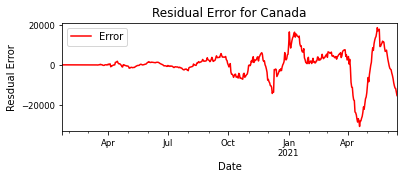

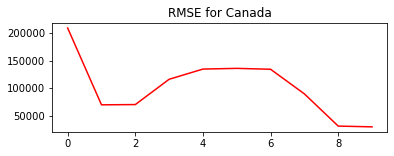

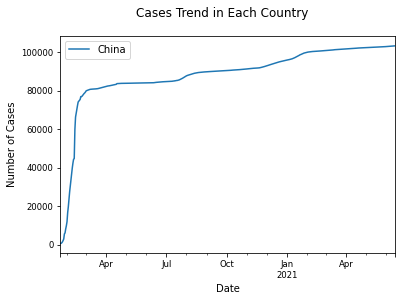

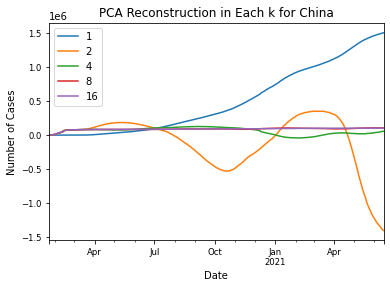

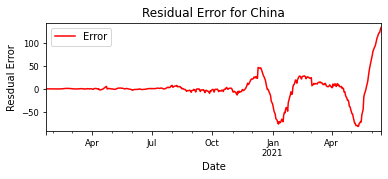

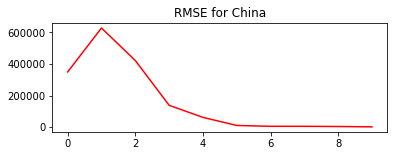

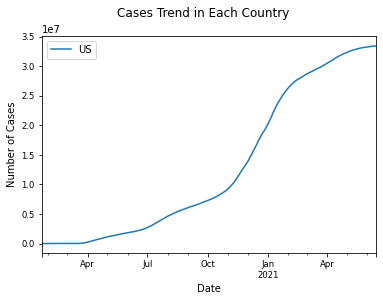

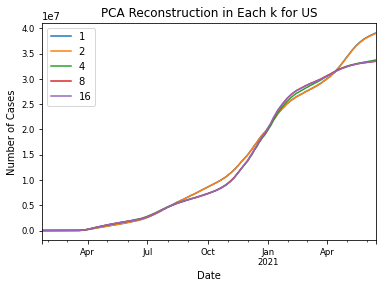

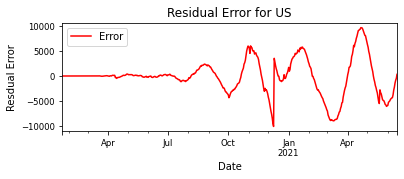

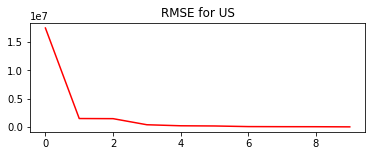

In [52]:
reconstructionByPCA(cases_raw,'Canada')
reconstructionByPCA(cases_raw,'China')
reconstructionByPCA(cases_raw,'US')

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. **[1]**



### (1) Show the effectiveness ###

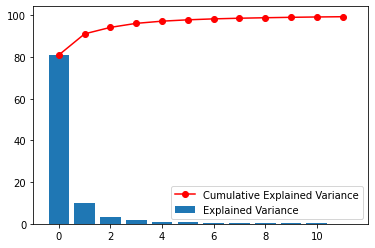

[80.95884052 91.0818022  94.18266211 96.11132555 97.15758973 97.80403381
 98.26001617 98.56841698 98.80444547 99.00780015 99.16885881 99.29432785]


In [53]:
U, S, V = np.linalg.svd(cases_raw.iloc[:, 1:])
eigValSum = sum(S)
expVar = [eigV/eigValSum*100 for eigV in S]
cumExpVar = np.cumsum(expVar)

figure_obj=plt.figure()
plt.bar(range(12), expVar[:12], label='Explained Variance')
plt.plot(cumExpVar[:12], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()
print(cumExpVar[:12])

### (2) Modify the code in part 3 to use SVD ###

In [54]:
def reconstructionBySVD(raw, country): 
    plotTimeSeries(raw, [country])
    
    row = raw['Country'] == country
    
    ### SVD
    U, S, V = np.linalg.svd(raw.iloc[:, 1:])
    
    ### topK list
    listSVD = [1, 5, 10, 15, 20]
    
    ### plot matrix
    plot_SVD = pd.DataFrame(np.zeros((raw.shape[1]-1,len(listSVD)+1)) ,
                           columns=['Date'] + listSVD)
    date = pd.date_range(start='20200122', end='20220101', freq='D').to_frame()  
    plot_SVD['Date'] = date.reset_index().iloc[:raw.shape[1]-1,1]
    for i in range(0, len(listSVD)):
        ### SVD
        k = listSVD[i]
        u = U[:, :k]
        s = np.zeros((k, k))
        for j in range(k):
            s[j][j] = S[j]
        v = V[:k]
        recoSVD = np.dot(u, s)
        recoSVD = np.dot(recoSVD, v)
        plot_SVD.iloc[:, i+1] =  recoSVD[row].reshape(recoSVD[row].shape[1])
        
    plot_SVD.plot(x='Date',fontsize=8.5,subplots=False, figsize=(6, 4),title='SVD Reconstruction in Each k for ' + country, ylabel='Number of Cases')
              
    ### Residual Error
    plot_resError = pd.DataFrame(np.zeros((raw.shape[1]-1,2)) ,
                           columns=['Date', 'Error'])
    date = pd.date_range(start='20200122', end='20220101', freq='D').to_frame()  
    plot_resError['Date'] = date.reset_index().iloc[:raw.shape[1]-1,1]
    
    raw_np = np.asarray(raw[row].iloc[:,1:])
    pred = raw_np.reshape(recoSVD[row].shape[1])
    truth = recoSVD[row].reshape(recoSVD[row].shape[1])
    plot_resError['Error'] = truth - pred
    plot_resError.plot(x='Date',fontsize=8.5,subplots=False, figsize=(6, 2), title='Residual Error for ' + country, color='red')

    
    ### RMSE
    raw_np = np.asarray(raw[row].iloc[:,1:])
    RMSE = np.zeros((10,))
    for i in range(0, 10):
        ### SVD
        k = i
        u = U[:, :k]
        s = np.zeros((k, k))
        for j in range(k):
            s[j][j] = S[j]
        v = V[:k]
        recoSVD = np.dot(u, s)
        recoSVD = np.dot(recoSVD, v)
        raw_np = np.asarray(raw[row].iloc[:,1:])
        pred = raw_np.reshape(recoSVD[row].shape[1])
        truth = recoSVD[row].reshape(recoSVD[row].shape[1])
        RMSE[i] = np.sqrt(mean_squared_error(truth, pred))
    
    figure_obj=plt.figure(figsize=(6,2))
    plt.plot(np.arange(10), 
             RMSE, 'r', linewidth=1.5)
    plt.title('RMSE for ' + country)
    plt.show()  

### (3) Test the function using the US, Canada, and China as inputs ###   

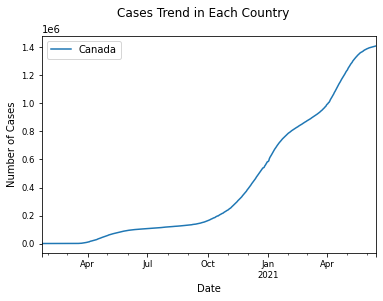

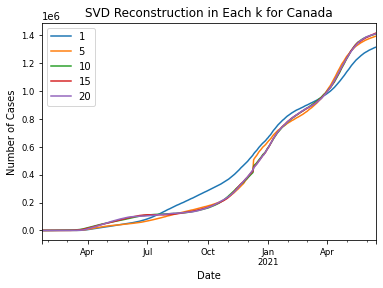

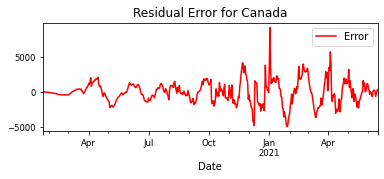

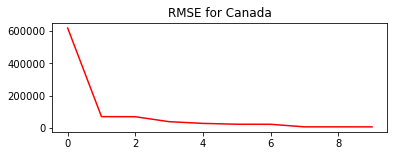

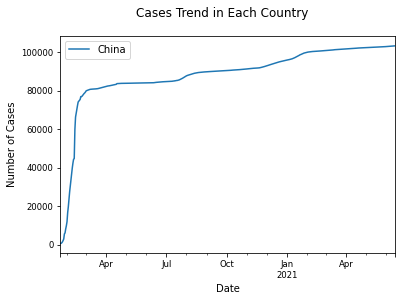

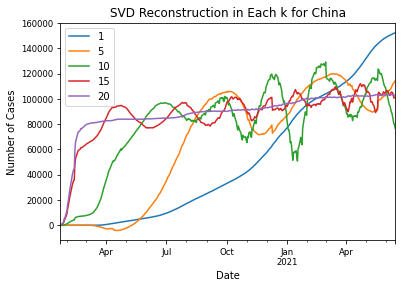

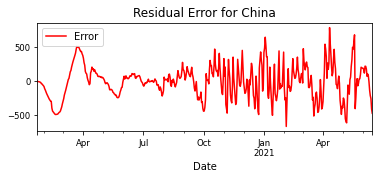

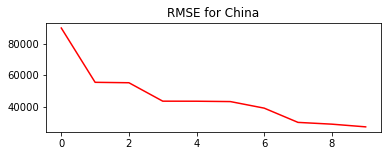

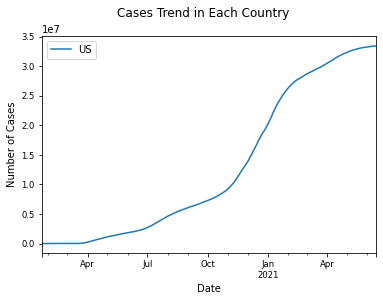

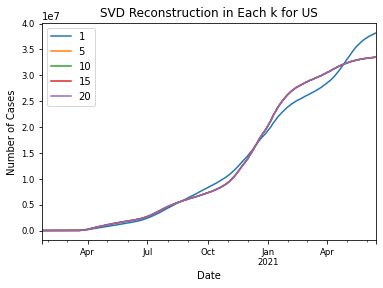

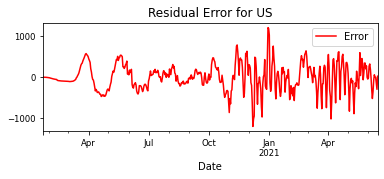

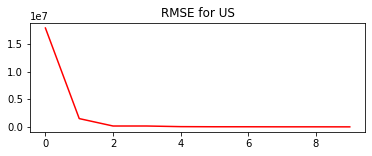

In [56]:
reconstructionBySVD(cases_raw,'Canada')
reconstructionBySVD(cases_raw,'China')
reconstructionBySVD(cases_raw,'US')

### (4). Explain if standardization or covariance computation is required for this part

#### Standardization or covariance is not required for this part. In PCA, high dimentional data is projected to lower dimension so that its variance can become larger. If the value of one feature (a column) of the data is particularly large, it accounts for a large proportion of the total error calculation. Then in the projection, features with smaller values are ignored in order to make the low-rank decomposition approximate the original data. There is no approximation process when using SVD decomposition to find the eigenvectors, so there is no need for normalization and no need to compute the covariance matrix.

### (5) Repeat part 3 and compare the PCA and SVD results ###
#### Both PCA and SVD can obtain good reconstruction by choosing specific value of k.  However, in some cases, the reconstruction results can vary significantly between PCA and SVD for different choices of k values. For example, in reconstructing the dataset for China，the intermediate results when reconstructed by these two methods are very different. AS the reconstruction shown in the figure below, by PCA, when k<4, the curve deviates greatly from the truth curve. This is because it is overfitted by the influence of other sample features. On the contrary, although SVD requires a larger value of k to reconstruct, and the final values of residual error and RMSE are slightly larger than with PCA, each of its reconstructed curves matches the trend of the real curve better.

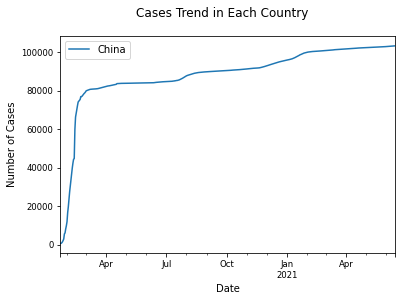

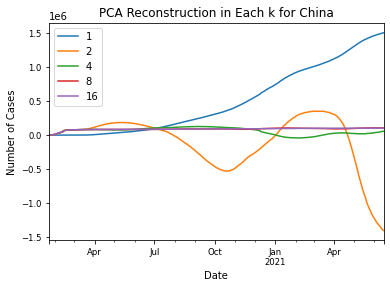

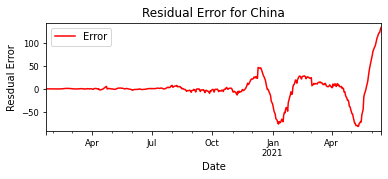

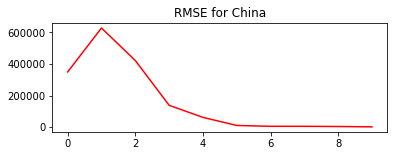

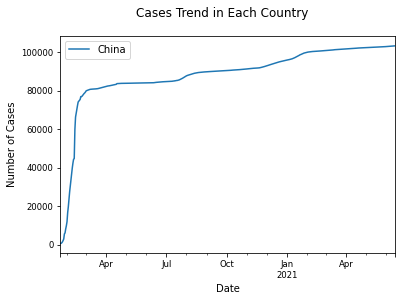

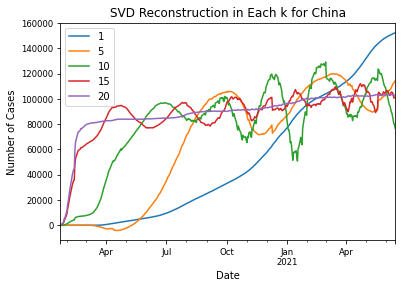

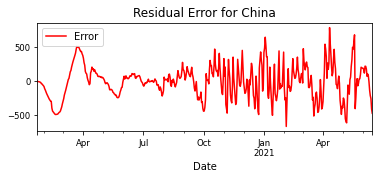

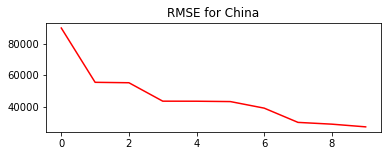

In [57]:
# reconstructionByPCA(cases_raw,'Canada')
# reconstructionBySVD(cases_raw,'Canada')
reconstructionByPCA(cases_raw,'China')
reconstructionBySVD(cases_raw,'China')
# reconstructionByPCA(cases_raw,'US')
# reconstructionBySVD(cases_raw,'US')

# Part 5: Let's collect a more recent dataset! [2 Marks]
Create a more recent dataset similar to the one provided in your handout using the raw information provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format. You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. **[1]**


Don't forget to add your new CSV file to your GitHub repo. The code below helps you to upload your new CSV file to your colab session. 




In [58]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload('Your github link + confirmed-oct21.csv')

### Repeat part 4 and compare the PCA and SVD results ###

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
new_raw = pd.read_csv(
    filepath_or_buffer='confirmed-oct21.csv',
    index_col=0,
    thousands=','
)
new_raw = new_raw.reset_index()

In [62]:
def reconstructionBySVD(raw, country): 
    plotTimeSeries(raw, [country])
    
    row = raw['Country'] == country
    
    ### SVD
    U, S, V = np.linalg.svd(raw.iloc[:, 1:])
    
    ### topK list
    listSVD = [1, 5, 10, 15, 20, 25]
    
    ### plot matrix
    plot_SVD = pd.DataFrame(np.zeros((raw.shape[1]-1,len(listSVD)+1)) ,
                           columns=['Date'] + listSVD)
    date = pd.date_range(start='20200122', end='20220101', freq='D').to_frame()  
    plot_SVD['Date'] = date.reset_index().iloc[:raw.shape[1]-1,1]
    for i in range(0, len(listSVD)):
        ### SVD
        k = listSVD[i]
        u = U[:, :k]
        s = np.zeros((k, k))
        for j in range(k):
            s[j][j] = S[j]
        v = V[:k]
        recoSVD = np.dot(u, s)
        recoSVD = np.dot(recoSVD, v)
        plot_SVD.iloc[:, i+1] =  recoSVD[row].reshape(recoSVD[row].shape[1])
        
    plot_SVD.plot(x='Date',fontsize=8.5,subplots=False, figsize=(6, 4),title='SVD Reconstruction in Each k for ' + country, ylabel='Number of Cases')
              
    ### Residual Error
    plot_resError = pd.DataFrame(np.zeros((raw.shape[1]-1,2)) ,
                           columns=['Date', 'Error'])
    date = pd.date_range(start='20200122', end='20220101', freq='D').to_frame()  
    plot_resError['Date'] = date.reset_index().iloc[:raw.shape[1]-1,1]
    
    raw_np = np.asarray(raw[row].iloc[:,1:])
    pred = raw_np.reshape(recoSVD[row].shape[1])
    truth = recoSVD[row].reshape(recoSVD[row].shape[1])
    plot_resError['Error'] = truth - pred
    plot_resError.plot(x='Date',fontsize=8.5,subplots=False, figsize=(6, 2), title='Residual Error for ' + country, color='red')

    
    ### RMSE
    raw_np = np.asarray(raw[row].iloc[:,1:])
    RMSE = np.zeros((10,))
    for i in range(0, 10):
        ### SVD
        k = i
        u = U[:, :k]
        s = np.zeros((k, k))
        for j in range(k):
            s[j][j] = S[j]
        v = V[:k]
        recoSVD = np.dot(u, s)
        recoSVD = np.dot(recoSVD, v)
        raw_np = np.asarray(raw[row].iloc[:,1:])
        pred = raw_np.reshape(recoSVD[row].shape[1])
        truth = recoSVD[row].reshape(recoSVD[row].shape[1])
        RMSE[i] = np.sqrt(mean_squared_error(truth, pred))
    
    figure_obj=plt.figure(figsize=(6,2))
    plt.plot(np.arange(10), 
             RMSE, 'r', linewidth=1.5)
    plt.title('RMSE for ' + country)
    plt.show()  

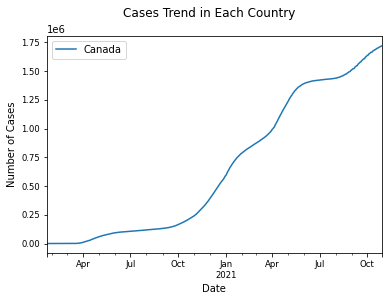

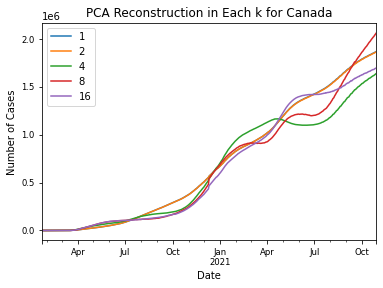

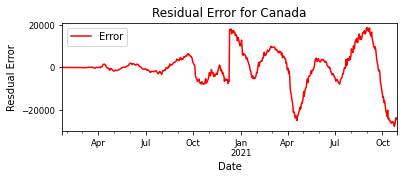

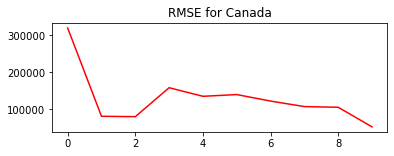

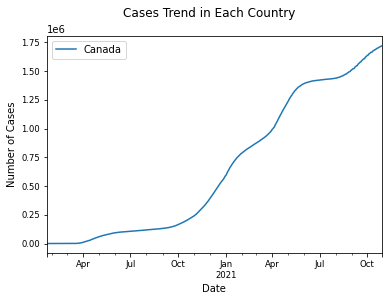

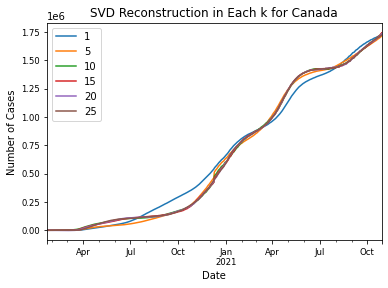

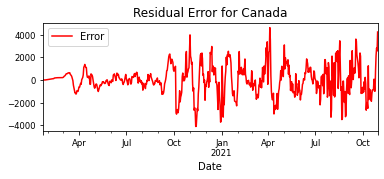

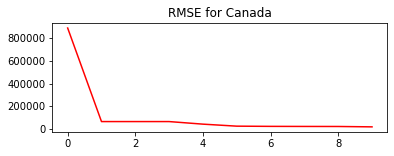

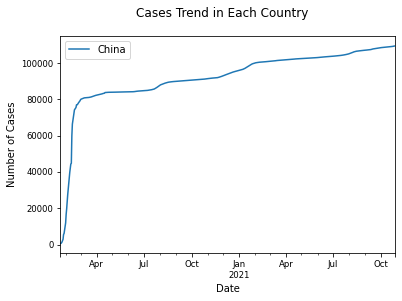

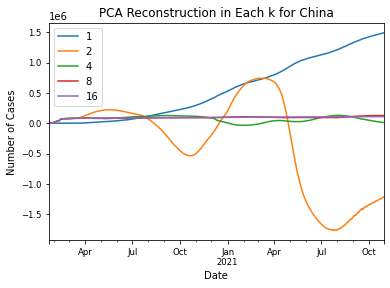

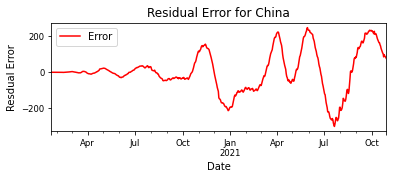

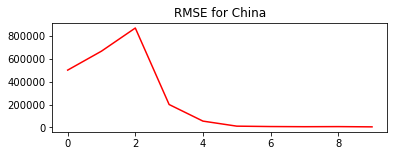

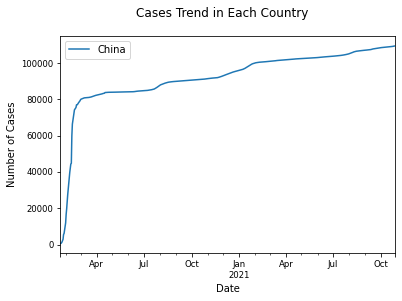

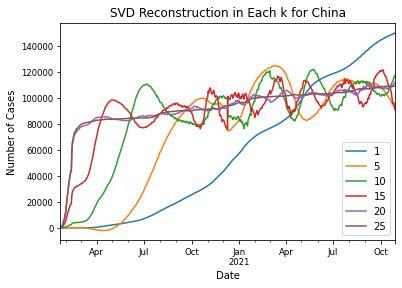

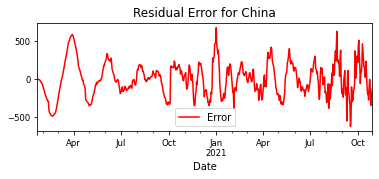

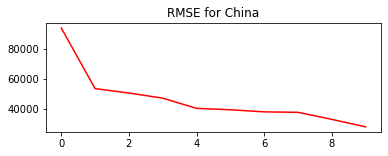

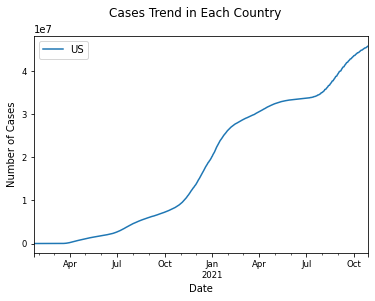

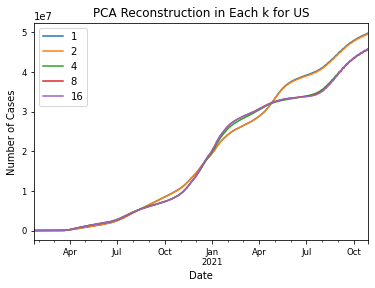

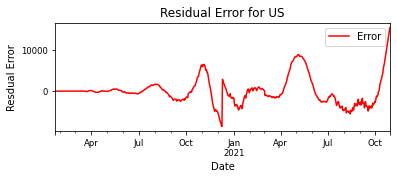

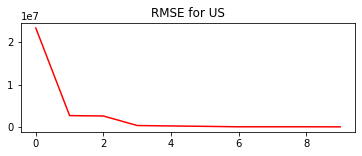

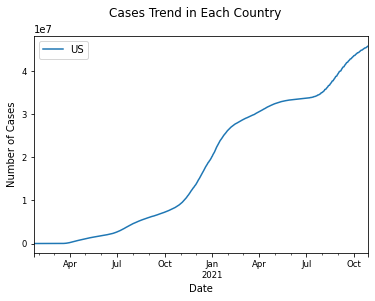

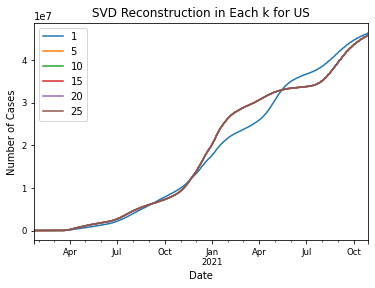

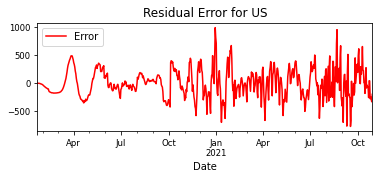

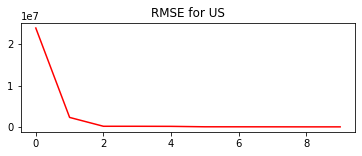

In [64]:
reconstructionByPCA(new_raw,'Canada')
reconstructionBySVD(new_raw,'Canada')

reconstructionByPCA(new_raw,'China')
reconstructionBySVD(new_raw,'China')

reconstructionByPCA(new_raw,'US')
reconstructionBySVD(new_raw,'US')

#### Both PCA and SVD can obtain good reconstruction by choosing specific value of k in this new dataset.  Similar to the previous dataset , in the cases of China, the reconstruction results vary significantly between PCA and SVD for different choices of k values and the intermediate results when reconstructed by these two methods are very different. AS the reconstruction shown in the figure above, by PCA, when k<4, the curve deviates greatly from the truth curve. On the contrary, although SVD requires a larger value of k to reconstruct, and the final values of residual error and RMSE are slightly larger than with PCA, each of its reconstructed curves matches the trend of the real curve better.

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

